<div class="head0">
    <div class="head0__name">
        Custom ode solver
    </div>
    <div class="head0__note">
        Solution of the ODE with multiple initial conditions by standard 4th order Runge-Kutta method.
    </div>
</div>

In [16]:
import sys
import time

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib as mpl
import matplotlib.pyplot as plt

sys.path.extend(['./../lib', './../helpers'])
from intertrain import Intertrain
from utils import eul, rk4
from config import config

from helpers import init_jupyter; init_jupyter()

Start |  5:28PM MSK on Sep 03, 2019 |
-------------------------------------


<div class="head1">
    <div class="head1__name">
        Test 1D
    </div>
</div>

Consider
$$
    d r = f(r, t) \, d t,
    \quad
    r \in R,
    \quad
    r(0) = r_0,
$$
where
$$
    f(r, t) = r^2.
$$

Analytic solution is
$$
    r(t) = \frac{r_0}{1 - r_0 t}.
$$

In [2]:
def func_f0(r, t):
    return r*r

def func_rt(t):
    return r0 / (1. - r0 * t)

In [3]:
d = 1
t_min = 0.
t_max = 0.0001
t_poi = 2
r0 = -2.5 * np.arange(1000) + 0.2

r_real = func_rt(t_max)

<div class="head2">
    <div class="head2__name">
        Solution by custom solver (Euler)
    </div>
</div>

In [4]:
_t = time.time()
r_calc = eul(func_f0, r0, t_min, t_max, t_poi)
_t = time.time() - _t
_e = np.mean(np.abs((r_real - r_calc) / r_real))

print('Error (mean) : %-8.2e'%_e)
print('Time (sec)   : %-8.2e'%_t)

Error (mean) : 2.08e-02
Time (sec)   : 1.38e-04


<div class="head2">
    <div class="head2__name">
        Solution by custom solver (RK4)
    </div>
</div>

In [5]:
_t = time.time()
r_calc = rk4(func_f0, r0, t_min, t_max, t_poi)
_t = time.time() - _t
_e = np.mean(np.abs((r_real - r_calc) / r_real))

print('Error (mean) : %-8.2e'%_e)
print('Time (sec)   : %-8.2e'%_t)

Error (mean) : 3.29e-06
Time (sec)   : 5.99e-04


<div class="head2">
    <div class="head2__name">
        Solution by scipy solver
    </div>
</div>

In [6]:
_t = time.time()
r0_ = r0.reshape(1, -1)
r = np.zeros(r0_.shape)
for j in range(r0_.shape[1]):
    def func(t, r):
        f = func_f0(r.reshape(-1, 1), t).reshape(-1)
        return f

    y1 = r0_[:, j]
    y2 = solve_ivp(func, [t_min, t_max], y1).y[:, -1]
    r[:, j] = y2
r_calc = r
_t = time.time() - _t
_e = np.mean(np.abs((r_real - r_calc) / r_real))

print('Error (mean) : %-8.2e'%_e)
print('Time (sec)   : %-8.2e'%_t)

Error (mean) : 1.39e-06
Time (sec)   : 2.13e-01


<div class="head2">
    <div class="head2__name">
        Comparison of the solvers
    </div>
</div>

In [7]:
T_max = [1E-6, 1E-5, 1E-4, 1E-3]
T_rk4, E_rk4 = [], []
T_eul, E_eul = [], []
T_rks, E_rks = [], []

for t_max in T_max:
    r_real = func_rt(t_max)
    
    _t = time.time()
    r_calc = rk4(func_f0, r0, t_min, t_max, t_poi)
    e = np.mean(np.abs((r_real - r_calc) / r_real))
    E_rk4.append(e)
    T_rk4.append(time.time() - _t)
    
    _t = time.time()
    r_calc = eul(func_f0, r0, t_min, t_max, t_poi)
    e = np.mean(np.abs((r_real - r_calc) / r_real))
    E_eul.append(e)
    T_eul.append(time.time() - _t)

    _t = time.time()
    r0_ = r0.reshape(1, -1)
    r = np.zeros(r0_.shape)
    for j in range(r0_.shape[1]):
        def func(t, r):
            f = func_f0(r.reshape(-1, 1), t).reshape(-1)
            return f

        y1 = r0_[:, j]
        y2 = solve_ivp(func, [t_min, t_max], y1).y[:, -1]
        r[:, j] = y2
    r_calc = r
    e = np.mean(np.abs((r_real - r_calc) / r_real))
    E_rks.append(e)
    T_rks.append(time.time() - _t)

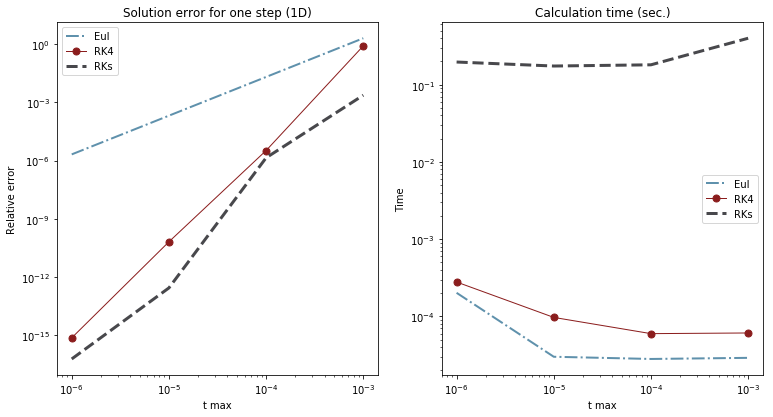

In [8]:
fig = plt.figure(**config['plot']['fig']['base_1_2'])
grd = mpl.gridspec.GridSpec(**config['plot']['grid']['base_1_2'])
ax1 = fig.add_subplot(grd[0, 0])
ax2 = fig.add_subplot(grd[0, 1])

opts = config['plot']['line']['stat'].copy()
opts['label'] = 'Eul'
ax1.plot(T_max, E_eul, **opts)

opts = config['plot']['line']['calc'].copy()
opts['label'] = 'RK4'
ax1.plot(T_max, E_rk4, **opts)

opts = config['plot']['line']['init'].copy()
opts['label'] = 'RKs'
ax1.plot(T_max, E_rks, **opts)

ax1.set_title('Solution error for one step (1D)')
ax1.set_xlabel('t max')
ax1.set_ylabel('Relative error')
ax1.legend(loc='best')
ax1.semilogx()
ax1.semilogy()

opts = config['plot']['line']['stat'].copy()
opts['label'] = 'Eul'
ax2.plot(T_max, T_eul, **opts)

opts = config['plot']['line']['calc'].copy()
opts['label'] = 'RK4'
ax2.plot(T_max, T_rk4, **opts)

opts = config['plot']['line']['init'].copy()
opts['label'] = 'RKs'
ax2.plot(T_max, T_rks, **opts)

ax2.set_title('Calculation time (sec.)')
ax2.set_xlabel('t max')
ax2.set_ylabel('Time')
ax2.legend(loc='best')
ax2.semilogx()
ax2.semilogy()

plt.show()

<div class="head1">
    <div class="head1__name">
        Test 2D
    </div>
</div>

Consider
$$
    d r = f(r, t) \, d t,
    \quad
    r = (r_1, r_2) \in R^{2},
    \quad
    r(0) = r_0,
$$

Let set analytic solution
$$
    r_1(t) = \sin{2 t^2} + r_{0, 1},
    \quad
    r_2(t) = \cos{2 t^2} + r_{0, 2} - 1.
$$
then for the rhs we have
$$
    f_1(r, t) = 4 t \cos{2 t^2} = 4 t (r_2 - r_{0, 2} + 1),
    \quad
    f_2(r, t) = - 4 t \sin{2 t^2} = - 4 t (r_1 - r_{0, 1}).
$$

In [9]:
def func_f0(r, t):
    v1 = +4. * t * (r[1, :] - r0[1, :] + 1.)
    v2 = -4. * t * (r[0, :] - r0[0, :])
    return np.vstack([v1, v2])

def func_f0_el(r, t, r0):
    v1 = +4. * t * (r[1, :] - r0[1, :] + 1.)
    v2 = -4. * t * (r[0, :] - r0[0, :])
    return np.vstack([v1, v2])

def func_rt(t):
    v1 = np.sin(2. * t * t) + r0[0, :]
    v2 = np.cos(2. * t * t) + r0[1, :] - 1.
    return np.vstack([v1, v2])

In [10]:
t_min = 0.
t_max = 0.001
t_poi = 2
r0 = np.vstack([
    np.arange(100) * 1.1 + 0.2,
    np.arange(100) * 1.5 + 0.3,
])

r_real = func_rt(t_max)

<div class="head2">
    <div class="head2__name">
        Solution by custom solver (Euler)
    </div>
</div>

In [11]:
_t = time.time()
r_calc = eul(func_f0, r0, t_min, t_max, t_poi)
_t = time.time() - _t
_e = np.mean(np.abs((r_real - r_calc) / r_real))

print('Error (mean) : %-8.2e'%_e)
print('Time (sec)   : %-8.2e'%_t)

Error (mean) : 9.47e-08
Time (sec)   : 2.04e-04


<div class="head2">
    <div class="head2__name">
        Solution by custom solver (RK4)
    </div>
</div>

In [12]:
_t = time.time()
r_calc = rk4(func_f0, r0, t_min, t_max, t_poi)
_t = time.time() - _t
_e = np.mean(np.abs((r_real - r_calc) / r_real))

print('Error (mean) : %-8.2e'%_e)
print('Time (sec)   : %-8.2e'%_t)

Error (mean) : 2.98e-18
Time (sec)   : 3.33e-04


<div class="head2">
    <div class="head2__name">
        Solution by scipy solver
    </div>
</div>

In [13]:
_t = time.time()

r = np.zeros(r0.shape)
for j in range(r0.shape[1]):
    def func(t, r):
        f = func_f0_el(r.reshape(-1, 1), t, r0[:, j].reshape(-1, 1)).reshape(-1)
        return f

    y1 = r0[:, j]
    y2 = solve_ivp(func, [t_min, t_max], y1).y[:, -1]
    r[:, j] = y2
r_calc = r
_t = time.time() - _t

r_real = func_rt(t_max)

_e = np.mean(np.abs((r_real - r_calc) / r_real))

print('Error (mean) : %-8.2e'%_e)
print('Time (sec)   : %-8.2e'%_t)

Error (mean) : 1.45e-17
Time (sec)   : 8.25e-02


<div class="head2">
    <div class="head2__name">
        Comparison of the solvers
    </div>
</div>

In [14]:
T_max = [1E-6, 1E-5, 1E-4, 1E-3]
T_rk4, E_rk4 = [], []
T_eul, E_eul = [], []
T_rks, E_rks = [], []

for t_max in T_max:
    r_real = func_rt(t_max)
    
    _t = time.time()
    r_calc = rk4(func_f0, r0, t_min, t_max, t_poi)
    e = np.mean(np.abs((r_real - r_calc) / r_real))
    E_rk4.append(e)
    T_rk4.append(time.time() - _t)
    
    _t = time.time()
    r_calc = eul(func_f0, r0, t_min, t_max, t_poi)
    e = np.mean(np.abs((r_real - r_calc) / r_real))
    E_eul.append(e)
    T_eul.append(time.time() - _t)

    _t = time.time()
    r0_ = r0.copy()
    r = np.zeros(r0_.shape)
    for j in range(r0_.shape[1]):
        def func(t, r):
            f = func_f0_el(r.reshape(-1, 1), t, r0[:, j].reshape(-1, 1)).reshape(-1)
            return f

        y1 = r0_[:, j]
        y2 = solve_ivp(func, [t_min, t_max], y1).y[:, -1]
        r[:, j] = y2
    r_calc = r
    e = np.mean(np.abs((r_real - r_calc) / r_real))
    E_rks.append(e)
    T_rks.append(time.time() - _t)

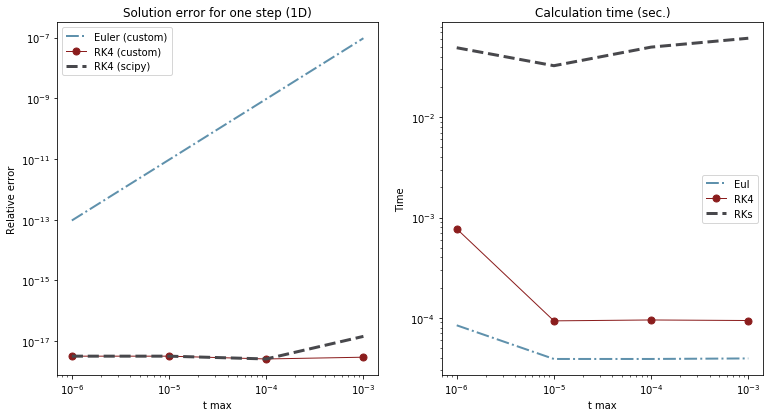

In [15]:
fig = plt.figure(**config['plot']['fig']['base_1_2'])
grd = mpl.gridspec.GridSpec(**config['plot']['grid']['base_1_2'])
ax1 = fig.add_subplot(grd[0, 0])
ax2 = fig.add_subplot(grd[0, 1])

opts = config['plot']['line']['stat'].copy()
opts['label'] = 'Euler (custom)'
ax1.plot(T_max, E_eul, **opts)

opts = config['plot']['line']['calc'].copy()
opts['label'] = 'RK4 (custom)'
ax1.plot(T_max, E_rk4, **opts)

opts = config['plot']['line']['init'].copy()
opts['label'] = 'RK4 (scipy)'
ax1.plot(T_max, E_rks, **opts)

ax1.set_title('Solution error for one step (1D)')
ax1.set_xlabel('t max')
ax1.set_ylabel('Relative error')
ax1.legend(loc='best')
ax1.semilogx()
ax1.semilogy()

opts = config['plot']['line']['stat'].copy()
opts['label'] = 'Eul'
ax2.plot(T_max, T_eul, **opts)

opts = config['plot']['line']['calc'].copy()
opts['label'] = 'RK4'
ax2.plot(T_max, T_rk4, **opts)

opts = config['plot']['line']['init'].copy()
opts['label'] = 'RKs'
ax2.plot(T_max, T_rks, **opts)

ax2.set_title('Calculation time (sec.)')
ax2.set_xlabel('t max')
ax2.set_ylabel('Time')
ax2.legend(loc='best')
ax2.semilogx()
ax2.semilogy()

plt.show()

<div class="end"></div>